In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
df_under70k = pd.read_pickle('/Users/pkc/PycharmProjects/pythonProject/Automotive/df_under70k.pickle')

In [5]:
df_under70k.year.value_counts()

year
2013    4255
2016    4249
2012    4210
2015    4204
2017    4177
2014    4174
2020    4151
2018    4139
2019    4109
2011    4102
2021    3936
Name: count, dtype: int64

in order to have a more workable dataframe with less skewing towards those three top prices, i trimmed the datafrme from all cars above 70k, copied the dataframe and created a new one out of it called df_under 70k. this dataframe should be much easier to analyze. All of this was done in the auto_DF_Basic notebook pickled and so this df_under70k is a dataframe read from that pickle.

<Axes: ylabel='proportion'>

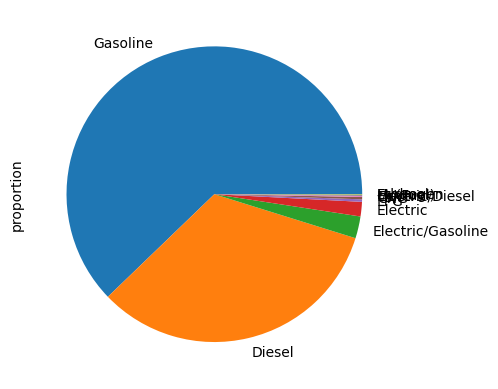

In [130]:
df_under70k.fuel.value_counts(normalize=True).plot(kind='pie')

<Axes: ylabel='Frequency'>

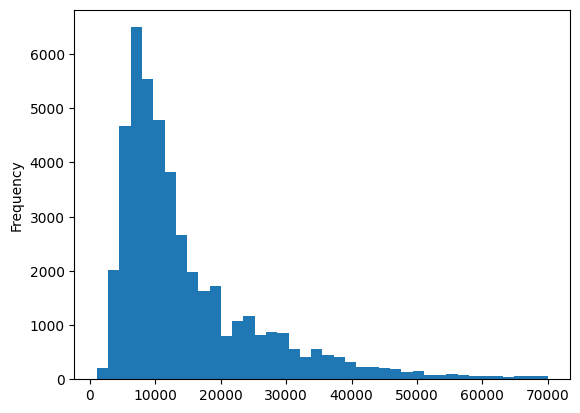

In [131]:
df_under70k.price.plot(kind="hist",bins=40)

based on this, it looks like most of hte values are in the 2k to 20k range. Also, we can see the prices are right skewed, meaning most of the values are on the lower end and trailing to the right

In [132]:
df_under70k.price.describe()

count    45706.000000
mean     15027.199602
std      11264.592158
min       1100.000000
25%       7489.000000
50%      10990.000000
75%      18890.000000
max      69999.000000
Name: price, dtype: float64

based on the IQR above there, the middle 50% values are between about 7.5k and 18.9k. This confirms why the data skews right. Most of

In [133]:
3*((15027-10990)/(11264)) # the pearson skewness coefficient, for what it's worth

1.0751953125

<Axes: xlabel='year'>

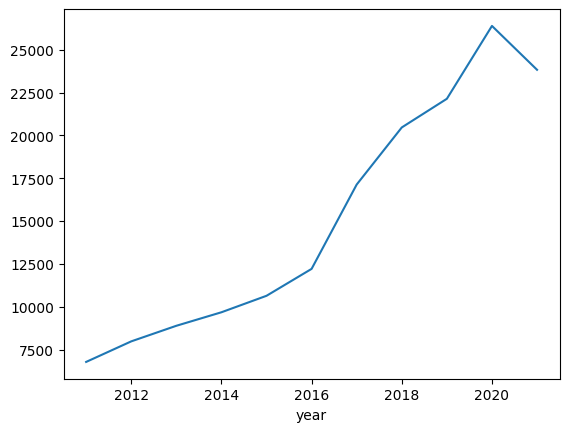

In [134]:
df_under70k.groupby(['year']).price.mean().plot(kind="line") #shows what the average price is based on year of registration

<Axes: xlabel='fuel'>

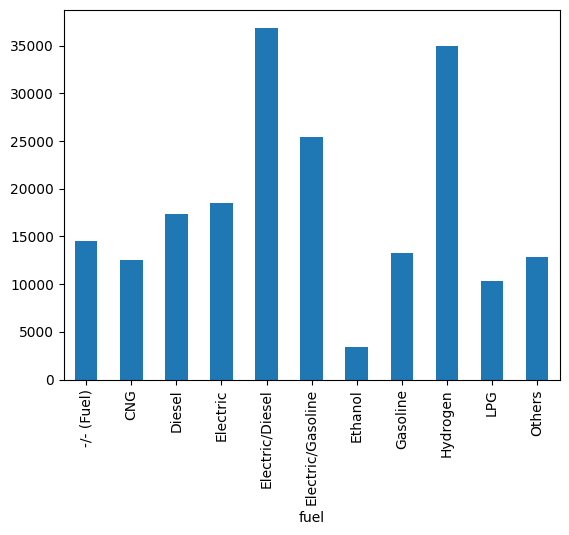

In [135]:
df_under70k.groupby('fuel').price.mean().plot(kind='bar') #shows the frequency distribution based on the fuel system type of the automobile

I decided to break down the data into two separate dataframes, one for top ten selling brands and then the rest into not top ten so as to make some comparisons

In [136]:
df_under70k.make.value_counts().head(15)

make
Volkswagen       6891
Opel             4814
Ford             4438
Skoda            2889
Renault          2828
Audi             2545
BMW              2347
Mercedes-Benz    2239
SEAT             1924
Hyundai          1888
Fiat             1700
Toyota           1275
Peugeot          1232
Kia              1055
smart             974
Name: count, dtype: int64

create a list of all the top ten make brands to use to divide the data

In [137]:
topTenMakesList= df_under70k.make.value_counts().head(10).index.tolist()
topTenMakesList

['Volkswagen',
 'Opel',
 'Ford',
 'Skoda',
 'Renault',
 'Audi',
 'BMW',
 'Mercedes-Benz',
 'SEAT',
 'Hyundai']

created a separate dataframe df_top_ten as a copy of the df_under70k but only for makes from the brands which are among the top ten selling brands.

In [138]:
df_top_ten= df_under70k[df_under70k.make.isin(topTenMakesList)].copy()

In [139]:
df_top_ten.reset_index#reset the index

<bound method DataFrame.reset_index of        mileage        make    model      fuel       gear       offerType   
0       235000         BMW      316    Diesel     Manual            Used  \
1        92800  Volkswagen     Golf  Gasoline     Manual            Used   
2       149300        SEAT     Exeo  Gasoline     Manual            Used   
3        96200     Renault   Megane  Gasoline     Manual            Used   
6        91894     Renault   Scenic    Diesel     Manual            Used   
...        ...         ...      ...       ...        ...             ...   
46378      234        Audi       A3  Gasoline  Automatic  Employee's car   
46379     6000     Renault   Kadjar  Gasoline     Manual   Demonstration   
46381     4800  Volkswagen  T-Cross  Gasoline  Automatic   Demonstration   
46382        8        Audi       Q2  Gasoline  Automatic  Employee's car   
46399     1500       Skoda    Fabia  Gasoline     Manual   Demonstration   

       price     hp  year  
0       6800  116.0 

In [140]:
round(df_top_ten.price.mean(),1) # this shows the average price for a vehicle among the top ten selling brands

15566.5

In [141]:
df_top_ten.groupby(['make']).price.mean()# this shows the average price for the top ten selling brands. as you can see, Audi, BMW, and Mercedes-Benz all average above 20k while the other brands are in the 12k to 16k range

make
Audi             26107.198821
BMW              21718.017043
Ford             13726.281208
Hyundai          12861.510593
Mercedes-Benz    23923.348370
Opel             10442.955339
Renault          11235.391089
SEAT             12847.433472
Skoda            13723.617515
Volkswagen       15677.709621
Name: price, dtype: float64

In [142]:
df_top_ten.sort_values('mileage',ascending=False).groupby('make').head(25)

,mileage,make,model,fuel,gear,offerType,price,hp,year
16869,1111111,Opel,Karl,Gasoline,Manual,Demonstration,10490,73.0,2019
38049,999999,BMW,320,-/- (Fuel),NaN,Used,1999,NaN,2014
34744,699000,Mercedes-Benz,Sprinter,Diesel,Manual,Used,3990,163.0,2011
25438,620000,Mercedes-Benz,Vito,Diesel,Manual,Used,6500,163.0,2014
13955,599900,Ford,Transit,Diesel,Manual,Used,5990,116.0,2012
...,...,...,...,...,...,...,...,...,...
28534,203973,Hyundai,i30,Diesel,Manual,Used,4300,116.0,2011
27120,200200,Hyundai,iX35,Gasoline,Manual,Used,7300,135.0,2013
37313,199000,Hyundai,i40,Diesel,Automatic,Used,7649,136.0,2013
23037,198751,Hyundai,iX35,Diesel,Automatic,Used,8999,184.0,2011


find if there's a correlation between horsepower and price, is a higher hp more likely to lead to higher price, is a higher mileage likely to lead to lower price

created separate values for the list of mileage and list of prices

In [143]:
xMileage= df_top_ten.mileage.tolist()

In [144]:
yPrice= df_top_ten.price.tolist()

created variables x and y to be arrays for the list of the mileage and the price

In [145]:
x= np.array(xMileage)
y= np.array(yPrice)

create a separate variable r which is the matrix of correlated values between mileage and price for top ten selling brands

In [146]:
r= np.corrcoef(x,y)

In [147]:
print(r)

[[ 1.         -0.42839165]
 [-0.42839165  1.        ]]


based on that above correlation calculation, mileage is weakly negatively correlated to price by 0.42, ok let's do horsepower

In [148]:
df_top_ten.hp.mean()

132.502881888323

the original analysis did not work because there are empty NaN variables for horsepower for 12 automobiles. so this basically will just fill those variables with the average horsepower value of about 132

In [149]:
df_top_ten.hp.isnull().value_counts()

hp
False    32791
True        12
Name: count, dtype: int64

In [150]:
df_top_ten.hp= df_top_ten.hp.fillna(132)

In [151]:
df_top_ten.hp.isnull().value_counts()

hp
False    32803
Name: count, dtype: int64

repeat process from above for horsepower. create list, hPower, for horsepower, create variable h to create an array, and then variable s to calculate correlation coefficients

In [152]:
hPower= df_top_ten.hp.tolist()
h= np.array(hPower)

In [153]:
s= np.corrcoef(h,y)
print(s)

[[1.         0.72403215]
 [0.72403215 1.        ]]


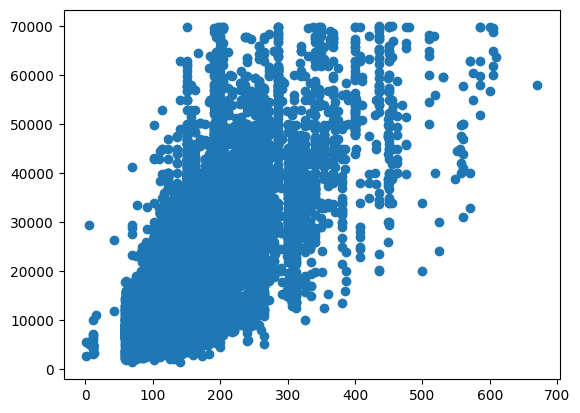

In [154]:
plt.scatter(hPower,yPrice)

so based on this , there is a 0.72 correlation between the amount of horsepower and the price of the vehicle

now I create a dataframe for the rest of the brands, the ones that are outside the top ten selling brands

In [155]:
df_not_top_ten=  df_under70k[df_under70k.make.isin(topTenMakesList)==False].copy()

In [156]:
df_not_top_ten.make.value_counts()

make
Fiat                1700
Toyota              1275
Peugeot             1232
Kia                 1055
smart                974
Citroen              957
Volvo                795
Nissan               753
Dacia                715
Mazda                714
MINI                 469
Mitsubishi           409
Suzuki               361
Chevrolet            222
Honda                181
Jeep                 155
Alfa                 128
Land                 127
Jaguar               110
Porsche               89
Cupra                 65
Subaru                57
Abarth                43
Lexus                 40
SsangYong             37
Lada                  33
Others                25
Tesla                 19
Dodge                 18
Lancia                18
DS                    16
Infiniti              15
Microcar              12
Daihatsu              10
Maserati               8
Cadillac               6
Piaggio                5
Chrysler               5
Alpina                 5
Ligier              

fill empty NaN values for horsepower again with the average horsepower for not top ten brand cars

In [157]:
df_not_top_ten.hp.isnull().value_counts()

hp
False    12886
True        17
Name: count, dtype: int64

In [158]:
df_not_top_ten.hp.mean()

116.86124476175695

In [159]:
df_not_top_ten.hp= df_not_top_ten.hp.fillna(116)

In [160]:
df_not_top_ten.hp.mean()

116.86011005192591

repeat the same analysis for not top ten

In [161]:
x_mileage = df_not_top_ten.mileage.tolist()
y_price = df_not_top_ten.price.tolist()
h_power= df_not_top_ten.hp.tolist()
xArray= np.array(x_mileage)
yArray= np.array(y_price)
hArray= np.array(h_power)


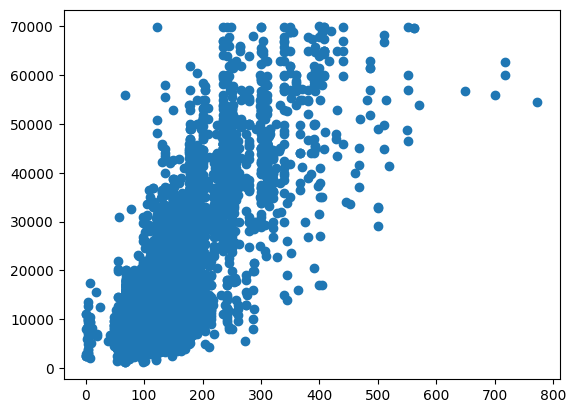

In [162]:
plt.scatter(h_power,y_price)

first matrix above is for mileage and price, the second is for horsepower and price for not top ten

In [163]:
result= np.corrcoef(xArray,yArray)
result2= np.corrcoef(hArray,yArray)
print(result)
print(result2)

[[ 1.        -0.3762472]
 [-0.3762472  1.       ]]
[[1.         0.78595588]
 [0.78595588 1.        ]]


so the mileage correlation with price is an even weaker negative -0.37 compared to top ten brands but for horsepower there is a stronger correlation of 0.78, so take that for what it's worth.

In [164]:
df_not_top_ten.mileage.mean()

61465.82306440363

In [165]:
df_top_ten.mileage.mean()

76120.20687132275

so the top ten brands generally have more mileage, doesn't prove anything might just be overrepresented with older cars, which makes sense since the brands are more popular so it makes sense that more of them would would be around

In [166]:
round(df_under70k.groupby('year').mileage.mean(),1)

year
2011    131524.5
2012    122969.5
2013    110315.7
2014     98709.1
2015     89358.9
2016     76967.1
2017     67756.3
2018     55051.8
2019     23078.6
2020      9475.8
2021       941.3
Name: mileage, dtype: float64

In [167]:
df_under70k.groupby('year').price.mean()

year
2011     6777.781570
2012     7977.664608
2013     8887.591069
2014     9676.465740
2015    10638.578021
2016    12210.349023
2017    17133.780704
2018    20467.364098
2019    22141.103188
2020    26394.630450
2021    23833.335366
Name: price, dtype: float64

this is just finding what the mileage is from year to year for all cars. showing that there is a decrease of about 11k miles which means probably the average user dries about 11k every year. There is a bigger jump from 2018 to 2019 which I don't know what that means. Maybe it has to do with the number of car users who trade in their old vehicles every three years. So more people trade in for a new automobile when their current one is about three years old.

In [168]:
#df_make_origin= pd.read_pickle('/Users/pkc/PycharmProjects/pythonProject/Automotive/df_make_origin.pickle')

now I have to do a join, add a country column to the df_under70k, if I rerun all this code, what will get screwed up, that's the issue. I mean, I made the top ten and not top ten lists based off the under70, maybe I should just add it to the original dataframe reading the raw file. do the join right there. I dunno. maybe I should do it in the other jupyter notebook so i don't screw this one up.

the good news is I'm finally doing relatively real programming work, running into regular issues. I have to think about databases, design and so on, which means I'm slightly more advanced.

In [169]:
df_joined_country= pd.read_pickle('/Users/pkc/PycharmProjects/pythonProject/Automotive/df_joined_lists.pickle')

the above two dataframes are pickles read from the joined list, that join was done on a whole separate notbook called germania. Basically, I imported some excel sheet i found on the internet, cleaned it up a little to make the join easier, cleaned up the missed joined values for certain brands which were either not on the imported excel sheet or were spelled differently. There were about 92 which I figured were not relevant so I just labeled them undetermined. 92 cars out of 45k should not affect the analysis too much. At a certain point, you have to decide that the data has been cleaned well enough, it doesn't have to be perfect because that will take too much time.

In [170]:
round(df_joined_country[df_joined_country.year==2012].groupby(['country']).price.mean(),1)

country
Czech              6287.3
France             5653.5
Germany           10115.2
Italy              6380.3
Japan              7354.0
Romania            5651.7
Russia             7200.0
South Korea        6562.6
Spain              5632.2
Sweden             9051.7
United Kingdom    48743.4
United States      6676.1
undetermined      14937.0
Name: price, dtype: float64

based on this snapshot of 2012 mean car prices based on country, it appears that Germany and the UK probably have higher mean prices because they sell luxury brands like MErcedes, BMW, Aston Martin, and so on.

In [171]:
round(df_joined_country[df_joined_country.year==2019].groupby(['country']).price.mean(),1)

country
Czech             18494.5
France            14951.2
Germany           31476.2
Italy             16410.2
Japan             19036.1
Romania           12558.8
Russia            14933.8
South Korea       17547.2
Spain             20030.2
Sweden            37638.3
United Kingdom    77644.6
United States     19064.5
undetermined      69308.4
Name: price, dtype: float64

<Axes: xlabel='country'>

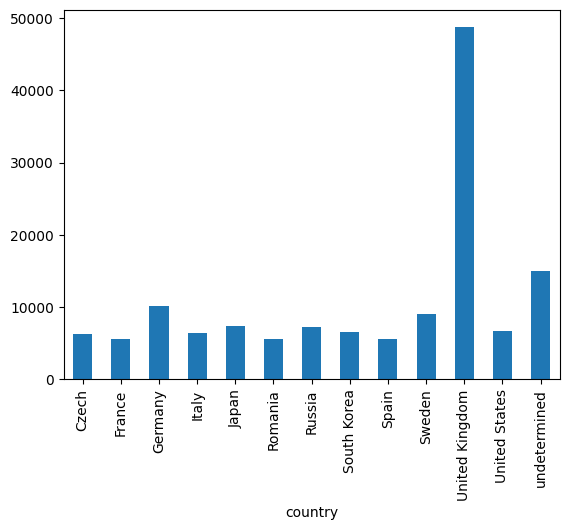

In [172]:
df_joined_country[df_joined_country.year==2012].groupby(['country']).price.mean().plot(kind='bar')

In [173]:
df_joined_country[df_joined_country.country=='United Kingdom'].sort_values(by='price').head(12)

,mileage,make,model,fuel,gear,offerType,price,hp,year,country
26393,150000,Jaguar,XF,Diesel,Automatic,Used,4199,211.0,2011,United Kingdom
37369,175971,Land,Rover Range Rover Sport,Diesel,Automatic,Used,7900,245.0,2012,United Kingdom
5329,185774,Land,Rover Freelander,Diesel,Manual,Used,8000,150.0,2011,United Kingdom
36145,195600,Jaguar,XF,Diesel,Automatic,Used,8200,190.0,2011,United Kingdom
36152,256997,Land,Rover Range Rover Sport,Diesel,Automatic,Used,8450,245.0,2011,United Kingdom
10398,142700,Land,Rover Freelander,Diesel,Manual,Used,9450,150.0,2013,United Kingdom
12198,236000,Jaguar,XF,Diesel,Automatic,Used,9900,241.0,2013,United Kingdom
3607,193830,Jaguar,XF,Diesel,Automatic,Used,10000,200.0,2013,United Kingdom
4505,169785,Jaguar,XF,Diesel,Automatic,Used,10440,241.0,2012,United Kingdom
38531,239995,Jaguar,XF,Diesel,Automatic,Used,11500,241.0,2013,United Kingdom


In [174]:
df_joined_country.groupby('fuel').price.mean()# this shows how much fuel type maybe affects price

fuel
-/- (Fuel)           14473.346154
CNG                  13308.430894
Diesel               19004.768568
Electric             24552.759067
Electric/Diesel      39141.016949
Electric/Gasoline    30219.399504
Ethanol               3450.000000
Gasoline             15669.687742
Hydrogen             34990.000000
LPG                  11607.294574
Others               13373.965517
Name: price, dtype: float64

In [175]:
df_joined_country.country.value_counts()

country
Germany           23559
France             5029
United States      4882
Japan              3825
South Korea        2980
Czech              2889
Spain              1989
Italy              1935
Sweden              808
Romania             715
United Kingdom      351
undetermined         93
Russia               33
Netherlands           1
Name: count, dtype: int64

In [176]:
df_joined_country[(df_joined_country.country=="Germany")|(df_joined_country.country=='United Kingdom')].groupby('year').year.value_counts()

year
2011    2191
2012    2314
2013    2196
2014    2070
2015    2042
2016    2023
2017    2621
2018    2877
2019    2264
2020    2152
2021    1160
Name: count, dtype: int64

In [179]:
df_joined_country[df_joined_country.country=='Germany'].make.value_counts()

make
Volkswagen       6931
Audi             5368
Opel             4814
BMW              2405
Mercedes-Benz    2354
smart             974
MINI              469
Porsche           244
Name: count, dtype: int64